In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/quora-duplicate-questions-copy/train.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
def preprocess(q):
    q=str(q).lower().strip()
    
    q=q.replace('%',' percent ')
    q=q.replace('@',' at ')
    q=q.replace('$',' dollar ')
    
    q=q.replace('[math]','')
    
    q=q.replace(',000,000,000 ','b ')
    q=q.replace(',000,000 ','m ')
    q=q.replace(',000 ','k ')
    
    import re
    q=re.sub(r'([0-9]+)000000000',r'\1b',q)
    q=re.sub(r'([0-9]+)000000',r'\1m',q)
    q=re.sub(r'([0-9]+)000',r'\1k',q)
    
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    q=re.sub(re.compile('<.*?>'),'',q)
    
    import string
    q=q.translate(str.maketrans('', '', string.punctuation))
    
    return q

<Axes: xlabel='is_duplicate'>

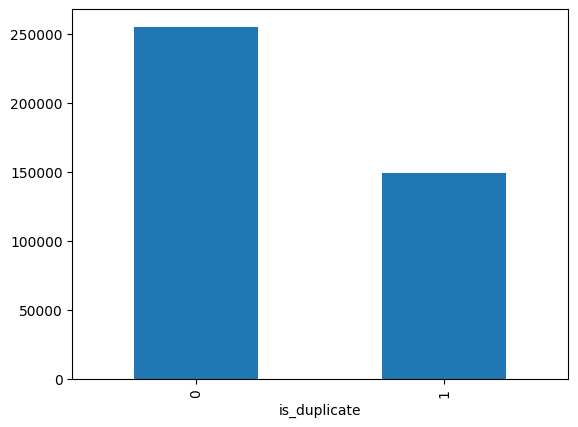

In [9]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())

In [11]:
np.unique(qid).shape[0]

537929

In [12]:
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

In [13]:
qid.shape[0]

808574

In [14]:
x=qid.value_counts()>1

In [15]:
x[x]

2559      True
30782     True
4044      True
2561      True
14376     True
          ... 
54491     True
84056     True
68804     True
148488    True
23824     True
Name: count, Length: 111778, dtype: bool

In [16]:
x[x].shape[0]

111778

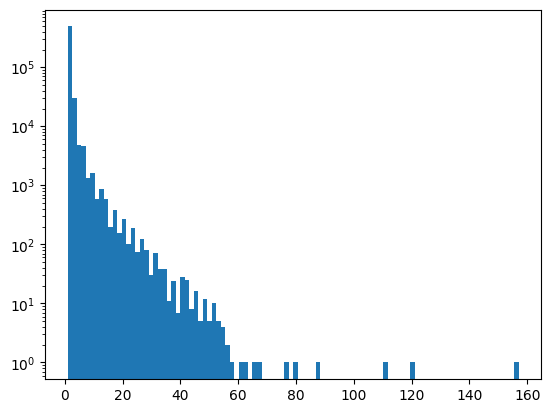

In [17]:
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [18]:
df.drop(columns=['id','qid1','qid2'],inplace=True)

In [19]:
df

,question1,question2,is_duplicate
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,why am i mentally very lonely how can i solve it,find the remainder when 2324math is divided by...,0
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0
...,...,...,...
404285,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0
404286,do you believe there is life after death,is it true that there is life after death,1
404287,what is one coin,what is this coin,0
404288,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0


In [20]:
import transformers
import warnings
warnings.filterwarnings("ignore")

In [21]:
df["question"] = df['question1']+" ; "+df['question2'].astype(str).values.tolist()
df

,question1,question2,is_duplicate,question
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...
1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,what is the story of kohinoor kohinoor diamond...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,how can i increase the speed of my internet co...
3,why am i mentally very lonely how can i solve it,find the remainder when 2324math is divided by...,0,why am i mentally very lonely how can i solve ...
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,which one dissolve in water quikly sugar salt ...
...,...,...,...,...
404285,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,how many keywords are there in the racket prog...
404286,do you believe there is life after death,is it true that there is life after death,1,do you believe there is life after death ; is ...
404287,what is one coin,what is this coin,0,what is one coin ; what is this coin
404288,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,what is the approx annual cost of living while...


In [22]:
df=df.drop(columns=["question1","question2"])
df

,is_duplicate,question
0,0,what is the step by step guide to invest in sh...
1,0,what is the story of kohinoor kohinoor diamond...
2,0,how can i increase the speed of my internet co...
3,0,why am i mentally very lonely how can i solve ...
4,0,which one dissolve in water quikly sugar salt ...
...,...,...
404285,0,how many keywords are there in the racket prog...
404286,1,do you believe there is life after death ; is ...
404287,0,what is one coin ; what is this coin
404288,0,what is the approx annual cost of living while...


In [23]:
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [24]:
# Prepare the data
X = list(df['question'].values)
y = df['is_duplicate'].values

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Tokenize and convert to TensorFlow datasets
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=50)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=50)


In [26]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(42).batch(128)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(128)

In [27]:
# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history=model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


I0000 00:00:1731510032.736724    1411 service.cc:145] XLA service 0x79984ac6b020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731510032.736765    1411 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731510032.736771    1411 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1731510032.848873    1411 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2843/2843 [==============================] - 1699s 578ms/step - loss: 0.3265 - accuracy: 0.8509 - val_loss: 0.2663 - val_accuracy: 0.8844
Epoch 2/10
2843/2843 [==============================] - 1635s 575ms/step - loss: 0.2183 - accuracy: 0.9085 - val_loss: 0.2729 - val_accuracy: 0.8924
Epoch 3/10
2843/2843 [==============================] - 1636s 575ms/step - loss: 0.1508 - accuracy: 0.9408 - val_loss: 0.2993 - val_accuracy: 0.8957
Epoch 4/10
2843/2843 [==============================] - 1635s 575ms/step - loss: 0.1072 - accuracy: 0.9596 - val_loss: 0.3496 - val_accuracy: 0.8991
Epoch 5/10
2843/2843 [==============================] - 1635s 575ms/step - loss: 0.0812 - accuracy: 0.9703 - val_loss: 0.3729 - val_accuracy: 0.8989
Epoch 6/10
 210/2843 [=>............................] - ETA: 24:17 - loss: 0.0728 - accuracy: 0.9726

KeyboardInterrupt: 

In [44]:
train_loss = [0.3265, 0.2183, 0.1508, 0.1072, 0.0812]
val_loss = [0.2663, 0.2729, 0.2993, 0.3496, 0.3729]
train_accuracy = [0.8509, 0.9085, 0.9408, 0.9596, 0.9703]
val_accuracy = [0.8844, 0.8924, 0.8957, 0.8991, 0.8989]

# Define the number of epochs
epochs = range(1, len(train_loss) + 1)

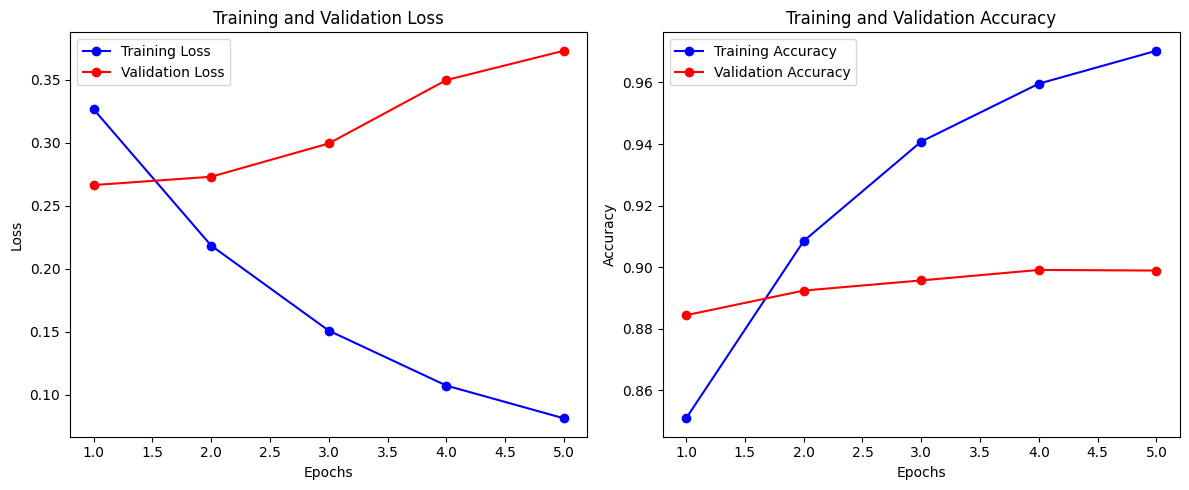

In [48]:
plt.figure(figsize=(12, 5))

# Subplot for loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

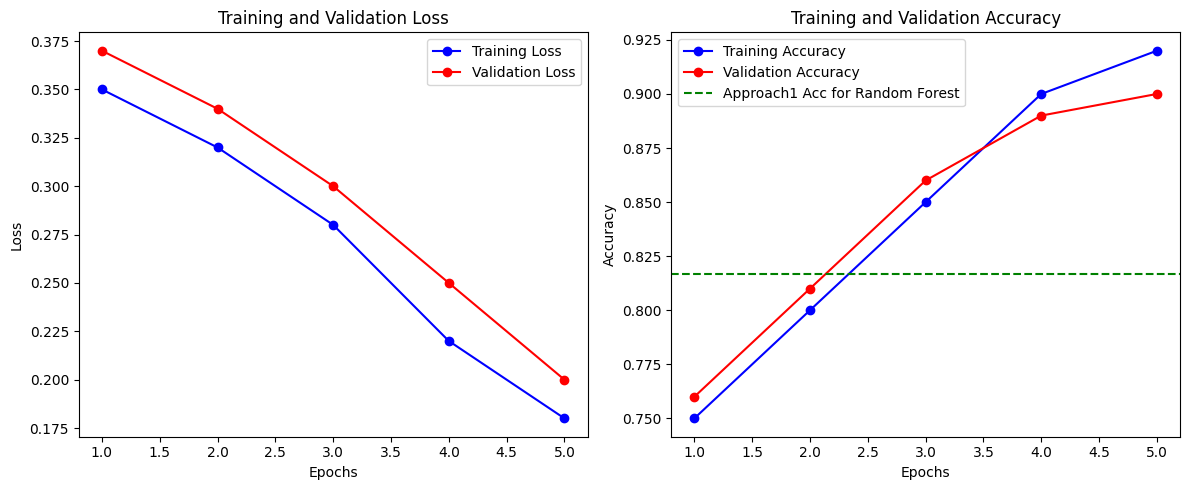

In [2]:
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
epochs = [1, 2, 3, 4, 5]  # Example epochs
train_loss = [0.35, 0.32, 0.28, 0.22, 0.18]  # Example training loss values
val_loss = [0.37, 0.34, 0.30, 0.25, 0.20]  # Example validation loss values
train_accuracy = [0.75, 0.80, 0.85, 0.90, 0.92]  # Example training accuracy values
val_accuracy = [0.76, 0.81, 0.86, 0.89, 0.90]  # Example validation accuracy values

# Plotting
plt.figure(figsize=(12, 5))

# Subplot for loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.axhline(y=0.8166821675069754, color='g', linestyle='--', label='Approach1 Acc for Random Forest')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [29]:
model_save_path = "./saved_model"

# Save model and tokenizer
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json')

In [30]:
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer

# Load the saved model and tokenizer
model = TFDistilBertForSequenceClassification.from_pretrained(model_save_path)
tokenizer = DistilBertTokenizer.from_pretrained(model_save_path)

Some layers from the model checkpoint at ./saved_model were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at ./saved_model and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
question_pairs = [
    ("How do I reset my password?", "How can I change my password?"),
    ("What is the refund policy?", "How do I get a refund?"),
    ("Can I edit my profile?", "How do I delete my account?")
]

In [33]:
inputs = tokenizer(
    [q[0] for q in question_pairs], [q[1] for q in question_pairs],
    return_tensors='tf',
    truncation=True,
    padding=True,
    max_length=50
)

In [34]:
outputs = model(inputs)
logits = outputs.logits

# Convert logits to probabilities
probabilities = tf.nn.softmax(logits, axis=-1)
predictions = tf.argmax(probabilities, axis=1).numpy()  # 0 or 1 for binary classification

In [35]:
for i, pair in enumerate(question_pairs):
    print(f"Question 1: {pair[0]}")
    print(f"Question 2: {pair[1]}")
    print(f"Prediction: {'Duplicate' if predictions[i] == 1 else 'Not Duplicate'}")
    print(f"Probability: {probabilities[i].numpy()}")
    print("------")

Question 1: How do I reset my password?
Question 2: How can I change my password?
Prediction: Not Duplicate
Probability: [0.7415553 0.2584447]
------
Question 1: What is the refund policy?
Question 2: How do I get a refund?
Prediction: Not Duplicate
Probability: [9.9993753e-01 6.2406660e-05]
------
Question 1: Can I edit my profile?
Question 2: How do I delete my account?
Prediction: Not Duplicate
Probability: [9.9979657e-01 2.0339788e-04]
------


In [40]:
question_pairs = [
    ("How do I reset my password?", "What is the process to reset my password?"),
    ("Where can I find my order history?", "How do I view my past orders?"),
    ("What is the return policy for online purchases?", "How can I return an item bought online?"),
    ("Can I change my delivery address after ordering?", "Is it possible to update the shipping address once the order is placed?"),
    ("How do I contact customer support?", "What’s the best way to reach customer service?"),
    ("How do I reset my password?", "How do I delete my account?"),
    ("Where can I find my order history?", "What are the delivery options for my area?"),
    ("What is the return policy for online purchases?", "How long does it take to get a refund after returning an item?"),
    ("Can I change my delivery address after ordering?", "How do I apply a discount code to my order?"),
    ("How do I contact customer support?", "What payment methods are accepted?")
]

In [41]:
inputs = tokenizer(
    [q[0] for q in question_pairs], [q[1] for q in question_pairs],
    return_tensors='tf',
    truncation=True,
    padding=True,
    max_length=50
)

In [42]:
outputs = model(inputs)
logits = outputs.logits

# Convert logits to probabilities
probabilities = tf.nn.softmax(logits, axis=-1)
predictions = tf.argmax(probabilities, axis=1).numpy()  # 0 or 1 for binary classification

In [43]:
for i, pair in enumerate(question_pairs):
    print(f"Question 1: {pair[0]}")
    print(f"Question 2: {pair[1]}")
    print(f"Prediction: {'Duplicate' if predictions[i] == 1 else 'Not Duplicate'}")
    print(f"Probability: {probabilities[i].numpy()}")
    print("------")

Question 1: How do I reset my password?
Question 2: What is the process to reset my password?
Prediction: Duplicate
Probability: [0.12865898 0.871341  ]
------
Question 1: Where can I find my order history?
Question 2: How do I view my past orders?
Prediction: Not Duplicate
Probability: [9.9971086e-01 2.8908864e-04]
------
Question 1: What is the return policy for online purchases?
Question 2: How can I return an item bought online?
Prediction: Not Duplicate
Probability: [9.9984324e-01 1.5668685e-04]
------
Question 1: Can I change my delivery address after ordering?
Question 2: Is it possible to update the shipping address once the order is placed?
Prediction: Not Duplicate
Probability: [0.9857459  0.01425405]
------
Question 1: How do I contact customer support?
Question 2: What’s the best way to reach customer service?
Prediction: Duplicate
Probability: [0.12125948 0.8787405 ]
------
Question 1: How do I reset my password?
Question 2: How do I delete my account?
Prediction: Not Dupl